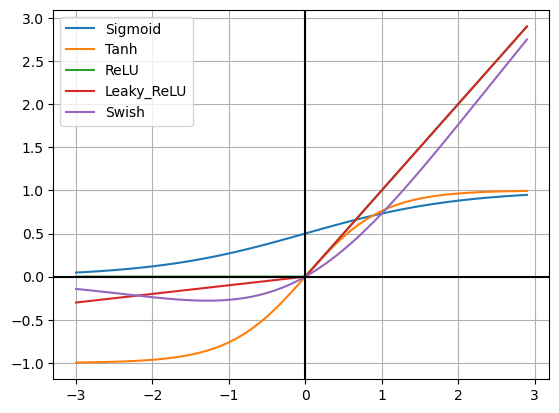

In [28]:
# Gerekli kütüphanelerin import edilmesi

import math
import matplotlib.pyplot as plt
import numpy as np

# Aktivasyon fonksiyonları tanımlamak

# Sigmoid
def sigmoid(x):
    a=[]
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a

# Hiperbolik Tanjant
def tanh(x, derivative=False):
    if (derivative == True):
        return (1-(x ** 2))
    return np.tanh(x)

# ReLU
def re(x):
    b=[]
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b

# Leaky_ReLU
def lr(x):
    b=[]
    for i in x:
        if i<0:
            b.append(i/10)
        else:
            b.append(i)
    return b

x = np.arange(-3., 3., 0.1)

sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x

# Fonksiyonların Ekrana çizdirilmesi

line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x, leaky_relu, label='Leaky_ReLU')
line_5, = plt.plot(x, swish, label='Swish')

plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True)
plt.show()

In [29]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras import regularizers  # Import regularizers


import tensorflow as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt


In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

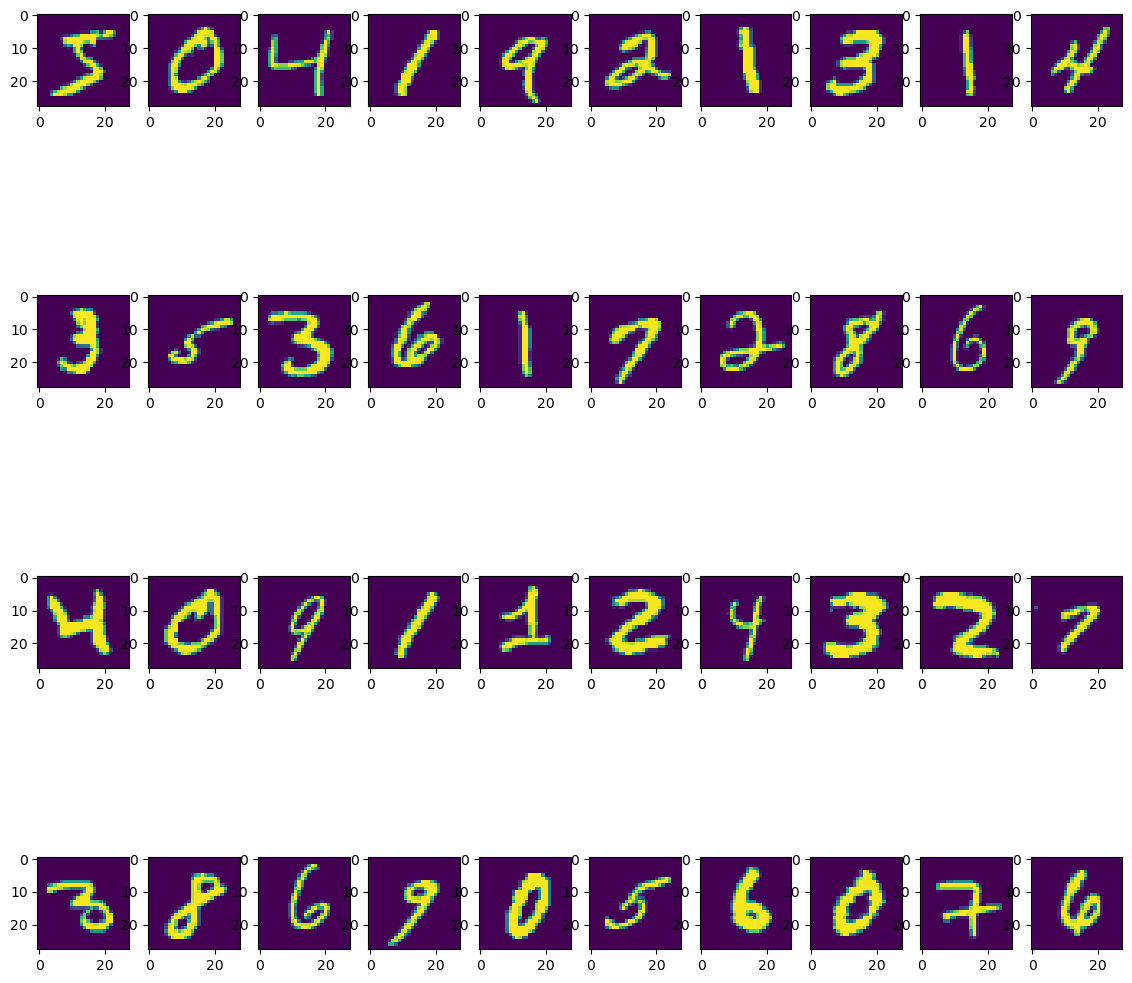

In [31]:
plt.figure(figsize=(14,14))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

batch_size = 128 # Küme Boyutu
num_classes = 10 # Sinif Sayisı
epochs = 20 # Egitimin epoch sayısı
w_12 = 1e-5 # Başlangıç

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, patience=5, min_lr=1e-5)

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test. shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüşturmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras. utils. to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_12),input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('sigmoid' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
hist_sigmoid=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=5,
verbose=1,
validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 200ms/step - accuracy: 0.7593 - loss: 0.8865 - val_accuracy: 0.8983 - val_loss: 0.3823 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 218ms/step - accuracy: 0.9452 - loss: 0.2294 - val_accuracy: 0.9574 - val_loss: 0.1585 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9622 - loss: 0.1506 - val_accuracy: 0.9798 - val_loss: 0.0811 - learning_rate: 0.0010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.9672 - loss: 0.1269 - val_accuracy: 0.9734 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 211ms/step - accuracy: 0.9737 - loss: 0.1072 - val_accuracy: 0.9456 - val_loss: 0.1803 - learning_rate: 0.0010
Test loss: 0.18032847344875336
Test accuracy: 0.9455999732017517


In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_12),
input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
hist_tanh=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=5,
verbose=1,
validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 207ms/step - accuracy: 0.8967 - loss: 0.3445 - val_accuracy: 0.9488 - val_loss: 0.1555 - learning_rate: 0.0010
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9760 - loss: 0.0835 - val_accuracy: 0.9819 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9816 - loss: 0.0667 - val_accuracy: 0.9803 - val_loss: 0.0672 - learning_rate: 0.0010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.9840 - loss: 0.0603 - val_accuracy: 0.9795 - val_loss: 0.0769 - learning_rate: 0.0010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.9862 - loss: 0.0538 - val_accuracy: 0.9820 - val_loss: 0.0624 - learning_rate: 0.0010
Test loss: 0.06243045628070831
Test accuracy: 0.9819999933242798


In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_12),
input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
hist_relu=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=5,
verbose=1,
validation_data=(x_test, y_test), callbacks=[reduce_1r])
score = model.evaluate(x_test, y_test, verbose-0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [42]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_12),
input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha =.001))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Dense(64, activation=LeakyReLU))
model.add(LeakyReLU(alpha =.001))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_12)))
model.add(BatchNormalization())
model.add(Dense(128, activation=LeakyReLU))
model.add(LeakyReLU(alpha =.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

C:\Users\Huawei\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24, 24, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,450 (4.66 MB)

 Trainable params: 1,221,002 (4.66 MB)

 Non-trainable params: 448 (1.75 KB)

In [51]:
import tensorflow as tf
tf.config.run_functions_eagerly(True) 
hist_Leakyrelu=model.fit(x_train, y_train, batch_size=batch_size, epochs=5,verbose=1, validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose-0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5


ValueError: Exception encountered when calling Dense.call().

[1mThe truth value of an array with more than one element is ambiguous. Use a.any() or a.all()[0m

Arguments received by Dense.call():
  • inputs=tf.Tensor(shape=(128, 24, 24, 64), dtype=float32)
  • training=True

In [47]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)

    plt.figure(figsize=(12, 8))
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
        plt.title(title[attribute])
        plt.ylabel(ylabel[attribute[-3:]])
        plt.xlabel('epoch')
        plt. legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish' ], loc=loc)
        plt.show()

hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]


NameError: name 'hist_relu' is not defined

In [ ]:
plot_history(hists, attribute='val_acc',axis=(-1,21,0.95,0.9960), loc='lower right')


In [ ]:
plot_history(hists, attribute='acc', axis=(-1,21,0.94,1.01), loc='lower right')


In [ ]:
plot_history(hists, attribute='loss', axis=(-1, 21,0.009,0.25), loc-'upper right')